In [1]:
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D,Dropout
from tensorflow.keras.applications import MobileNet 

from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Model 

In [2]:
base_model = MobileNet(weights = 'imagenet',include_top = False,input_shape = (224,224,3))

In [3]:
base_model.summary()

Model: "mobilenet_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 112, 112, 32)        │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_bn (BatchNormalization)        │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_relu (ReLU)                    │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1 (DepthwiseConv2D)          │ (None, 112, 112, 32)        │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_bn (BatchNormalization)    │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_relu (ReLU)                │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1 (Conv2D)                   │ (None, 112, 112, 64)        │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_bn (BatchNormalization)    │ (None, 112, 112, 64)        │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_relu (ReLU)                │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pad_2 (ZeroPadding2D)           │ (None, 113, 113, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2 (DepthwiseConv2D)          │ (None, 56, 56, 64)          │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_bn (BatchNormalization)    │ (None, 56, 56, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_relu (ReLU)                │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2 (Conv2D)                   │ (None, 56, 56, 128)         │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3 (DepthwiseConv2D)          │ (None, 56, 56, 128)         │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_3 (Conv2D)                   │ (None, 56, 56, 128)         │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 3,228,864 (12.32 MB)

 Trainable params: 3,206,976 (12.23 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [4]:
classes = 2 
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128,activation='relu')(x)
x = Dropout(0.2)(x)

predictions = Dense(classes, activation='softmax')(x)

model = Model(inputs = base_model.input, outputs = predictions)

In [5]:
for layer in base_model.layers:
    layer.trainable = False

In [6]:
model.compile(optimizer='adam',loss= 'categorical_crossentropy',metrics=['acc'])

In [7]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 112, 112, 32)        │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_bn (BatchNormalization)        │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_relu (ReLU)                    │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1 (DepthwiseConv2D)          │ (None, 112, 112, 32)        │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_bn (BatchNormalization)    │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_relu (ReLU)                │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1 (Conv2D)                   │ (None, 112, 112, 64)        │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_bn (BatchNormalization)    │ (None, 112, 112, 64)        │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_relu (ReLU)                │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pad_2 (ZeroPadding2D)           │ (None, 113, 113, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2 (DepthwiseConv2D)          │ (None, 56, 56, 64)          │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_bn (BatchNormalization)    │ (None, 56, 56, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_relu (ReLU)                │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2 (Conv2D)                   │ (None, 56, 56, 128)         │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3 (DepthwiseConv2D)          │ (None, 56, 56, 128)         │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_3 (Conv2D)                   │ (None, 56, 56, 128)         │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 3,360,322 (12.82 MB)

 Trainable params: 131,458 (513.51 KB)

 Non-trainable params: 3,228,864 (12.32 MB)

In [8]:
import os

In [9]:
os.listdir('cat_dog_sub')

['test', 'train']

In [10]:
w = 224 
h = 224

batch_size = 32

train_dir = r'cat_dog_sub\train'
test_dir = r'cat_dog_sub\test'

# data Augmentation
train_datagen = ImageDataGenerator(
    preprocessing_function = preprocess_input,
    rotation_range = 40,
    width_shift_range = 0.2,
    shear_range = 0.2,
    height_shift_range = True,
    fill_mode = 'nearest'          
 )

validation_datagen = ImageDataGenerator(
    preprocessing_function = preprocess_input,
    rotation_range = 40,
    width_shift_range = 0.2,
    shear_range = 0.2,
    height_shift_range = True,
    fill_mode = 'nearest'          
 )


In [11]:
train_gen = train_datagen.flow_from_directory(
    train_dir,target_size = (h,w),
    batch_size = batch_size,
    class_mode = 'categorical'
 )

validation_gen = train_datagen.flow_from_directory(
    test_dir,target_size = (h,w),
    batch_size = batch_size,
    class_mode = 'categorical'
 )


Found 1999 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [12]:
data  = next(train_gen)

In [13]:
epochs = 10
steps_per_epoch = train_gen.n//train_gen.batch_size
validation_steps = validation_gen.n//train_gen.batch_size

In [14]:
model.fit(train_gen,epochs=epochs,steps_per_epoch= steps_per_epoch,
         validation_data=validation_gen,validation_steps= validation_steps,
        verbose=1)

Epoch 1/10


C:\Users\nikhi\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


62/62 ━━━━━━━━━━━━━━━━━━━━ 68s 1s/step - acc: 0.8640 - loss: 0.3335 - val_acc: 0.9708 - val_loss: 0.0752
Epoch 2/10
 1/62 ━━━━━━━━━━━━━━━━━━━━ 20s 328ms/step - acc: 1.0000 - loss: 0.0229

C:\Users\nikhi\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 1.0000 - loss: 0.0116 - val_acc: 0.9375 - val_loss: 0.0629
Epoch 3/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - acc: 0.9634 - loss: 0.0986 - val_acc: 0.9546 - val_loss: 0.1156
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9688 - loss: 0.0550 - val_acc: 1.0000 - val_loss: 3.1584e-04
Epoch 5/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - acc: 0.9696 - loss: 0.0833 - val_acc: 0.9728 - val_loss: 0.0651
Epoch 6/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9688 - loss: 0.0259 - val_acc: 1.0000 - val_loss: 0.0053
Epoch 7/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - acc: 0.9822 - loss: 0.0462 - val_acc: 0.9743 - val_loss: 0.0764
Epoch 8/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.9688 - loss: 0.0215 - val_acc: 1.0000 - val_loss: 3.5588e-04
Epoch 9/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - acc: 0.9801 - loss: 0.0500 - val_acc: 0.9652 - val_loss: 0.0965
Epoch 10/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9062 - loss: 0.

In [47]:
my_dir = r'cat_dog_sub\test\cat\230.jpg'
img = image.load_img(my_dir,target_size=(224,224))

In [48]:
x = image.img_to_array(img)

In [49]:
import numpy as np

In [50]:
x = preprocess_input(x)

In [51]:
x = np.expand_dims(x,axis=0)

In [52]:
x.shape

(1, 224, 224, 3)

In [53]:
pred = model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


In [54]:
pred[0]

array([0.9747069 , 0.02529312], dtype=float32)

In [55]:
train_gen.class_indices

{'cat': 0, 'dog': 1}

In [56]:
import matplotlib.pyplot as plt
from PIL import Image

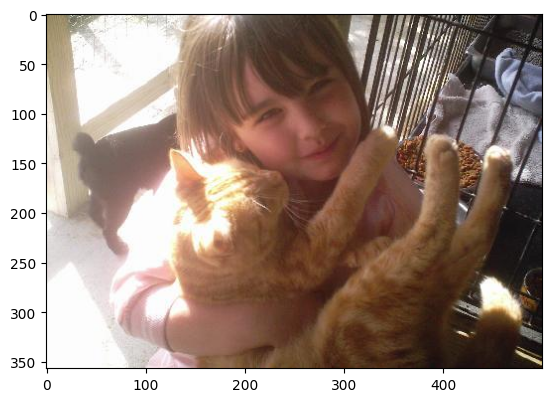

In [57]:
im = Image.open(my_dir)
plt.imshow(im)